# Machine Learning (WIA1006) Individual Lab Assignment
### Name : Elvis Sawing anak Muran
### Matric No. : U2101680/2

## 1.Data Analysis

### Import all the libraries

In [64]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import GridSearchCV


### Read the csv

In [65]:
df=pd.read_csv('../dataset/House Pricing.csv')

print(df.head())
# missing values
print("--------------------")
print("Missing values:")
print(df.isnull().sum())
print("--------------------")

#basic statistics
print(df.describe())

      price  area  bedrooms  bathrooms  stories mainroad guestroom basement   
0  13300000  7420         4          2        3      yes        no       no  \
1  12250000  8960         4          4        4      yes        no       no   
2  12250000  9960         3          2        2      yes        no      yes   
3  12215000  7500         4          2        2      yes        no      yes   
4  11410000  7420         4          1        2      yes       yes      yes   

  hotwaterheating airconditioning  parking prefarea furnishingstatus  
0              no             yes        2      yes        furnished  
1              no             yes        3       no        furnished  
2              no              no        2      yes   semi-furnished  
3              no             yes        3      yes        furnished  
4              no             yes        2       no        furnished  
--------------------
Missing values:
price               0
area                0
bedrooms          

## 2.Data Preprocessing

### Convert string values to numerical values

In [66]:
df=pd.read_csv('../dataset/House Pricing.csv')

df['mainroad'] = df['mainroad'].map({'yes': 1, 'no': 0})
df['guestroom'] = df['guestroom'].map({'yes': 1, 'no': 0})
df['basement'] = df['basement'].map({'yes': 1, 'no': 0})
df['hotwaterheating'] = df['hotwaterheating'].map({'yes': 1, 'no': 0})
df['airconditioning'] = df['airconditioning'].map({'yes': 1, 'no': 0})
df['prefarea'] = df['prefarea'].map({'yes': 1, 'no': 0})
df['furnishingstatus'] = df['furnishingstatus'].map({'unfurnished': 0, 'semi-furnished': 1, 'furnished': 2})
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,2
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,2
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,2
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,2


### Remove outliers

#### Using Interquartile Range Method

In [67]:
# Q1 and Q2
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)

#interquartile range
IQR = Q3 - Q1

# identify outliers
lower_bound = Q1 - 1.5*IQR
upper_bound = Q3 + 1.5*IQR
outliers = df[(df['price'] < lower_bound) | (df['price'] > upper_bound)]

df = df.drop(outliers.index)

### Normalize the data

In [68]:
MinMaxscaler=MinMaxScaler()
df.insert(0, 'id', range(len(df)))
id = df.pop('id')
df_scaled = pd.DataFrame(MinMaxscaler.fit_transform(df), columns=df.columns)
df = pd.concat([df_scaled, id.reset_index(drop=True)], axis=1)
last_col = df.pop(df.columns[-1])
df.insert(0, last_col.name, last_col)
df.head()

,id,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,0,1.000000,0.311828,0.6,0.0,0.333333,1.0,0.0,1.0,0.0,0.0,0.666667,0.0,0.5
1,1,1.000000,0.354839,0.6,0.5,0.333333,1.0,1.0,1.0,0.0,1.0,0.333333,1.0,0.0
2,2,0.980952,0.491039,0.4,0.5,1.000000,1.0,0.0,0.0,0.0,1.0,0.666667,0.0,1.0
3,3,0.971429,0.211470,0.4,0.5,0.333333,1.0,1.0,0.0,0.0,1.0,0.666667,0.0,1.0
4,4,0.966667,0.341935,0.4,0.5,0.333333,1.0,0.0,0.0,0.0,1.0,0.333333,1.0,0.5


## 3.Regression Model Development and 4.Model Evaluation

### Split the data

In [69]:
# test:30% train:70%
X = df.drop('price', axis=1)
y = df['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

### 1st model(Linear Regression)

Root Mean Squared Error(RMSE): 0.060389100680850766
Mean Squared Error(MSE): 0.00364684348104193
R-squared (coefficient of determination): 0.9382921206910935


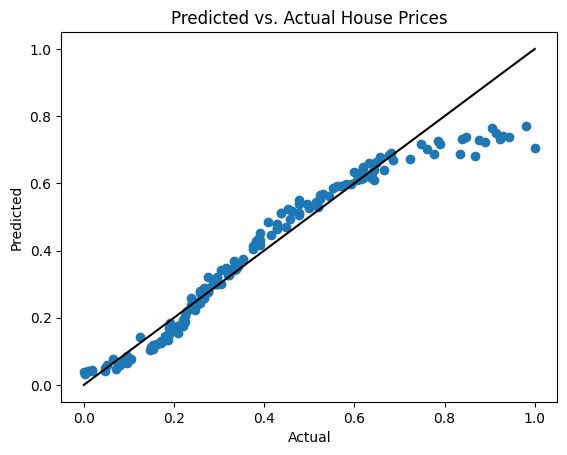

Accuracy of the model: 93.83%


In [70]:
#develop model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
y_pred = lr_model.predict(X_test)

#evaluate
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("Root Mean Squared Error(RMSE):",rmse)
print("Mean Squared Error(MSE):", mse)
print("R-squared (coefficient of determination):",r2)

# plot graph
plt.scatter(y_test, y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k-')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Predicted vs. Actual House Prices')
plt.show()

print("Accuracy of the model: {:.2f}%".format(lr_model.score(X_test, y_test)*100))

### Experiment with different parameters (1st model)

In [71]:

param_grid = {'fit_intercept': [True, False], 'copy_X': [True, False]}

grid_search = GridSearchCV(lr_model, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

lr_model_hyp = LinearRegression(**grid_search.best_params_)
lr_model_hyp.fit(X_train, y_train)
y_pred = lr_model_hyp.predict(X_test)

#evaluate
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("Best hyperparameters: ", grid_search.best_params_)
print("RMSE:", rmse)
print("MSE:", mse)
print("R-squared:", r2)

Best hyperparameters:  {'copy_X': True, 'fit_intercept': True}
RMSE: 0.060389100680850766
MSE: 0.00364684348104193
R-squared: 0.9382921206910935


### 2nd model(Polynomial Regression)

Root Mean Squared Error: 0.05451474233320721
Mean Squared Error: 0.002971857131655974
R-squared (coefficient of determination): 0.9497134982192477


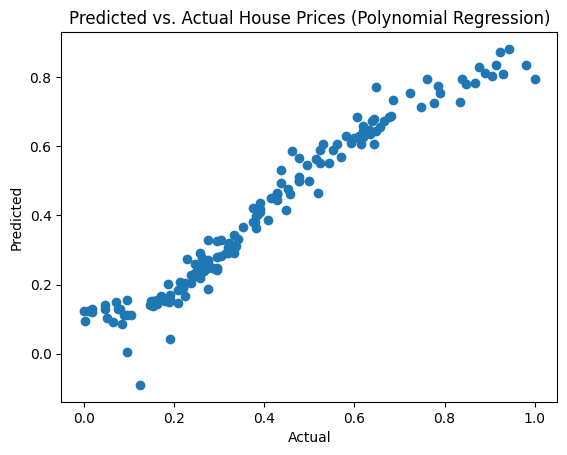

In [72]:
#develop model
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X_train)
lr_model_poly = LinearRegression()

lr_model_poly.fit(X_poly, y_train)
X_test_poly = poly.transform(X_test)
y_pred_poly = lr_model_poly.predict(X_test_poly)

#evaluate
mse_poly = mean_squared_error(y_test, y_pred_poly)
rmse_poly = np.sqrt(mse_poly)
r2_poly = r2_score(y_test, y_pred_poly)
print("Root Mean Squared Error:",rmse_poly)
print("Mean Squared Error:", mse_poly)
print("R-squared (coefficient of determination):",r2_poly)

# plot graph
plt.scatter(y_test, y_pred_poly)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Predicted vs. Actual House Prices (Polynomial Regression)')
plt.show()